In [ ]:
import json
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [ ]:
data = pd.read_csv(f'PATH/DF13.csv.gz',compression='gzip',lineterminator='\n');

In [ ]:
DS={}
for ds_index in range(1,8):
    # DS["DS"+str(ds_index)]=pd.concat([data[data["class"]=="bot"],data[data["class"]=="human"].sample(60364)])
    DS["DS"+str(ds_index)]= data.sample(frac=1).reset_index(drop=True)

In [ ]:
X={}
y={}
for ds_index in range(1,8):
  X["train"+str(ds_index)], X["test"+str(ds_index)], y["train"+str(ds_index)], y["test"+str(ds_index)] = train_test_split(DS["DS"+str(ds_index)].drop(['class'],axis=1), DS["DS"+str(ds_index)]['class'], test_size=0.1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifer={}
for ds_index in range(1,8):
  classifer["RF"+str(ds_index)]=RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
  classifer["RF"+str(ds_index)].fit(X["train"+str(ds_index)], y["train"+str(ds_index)])



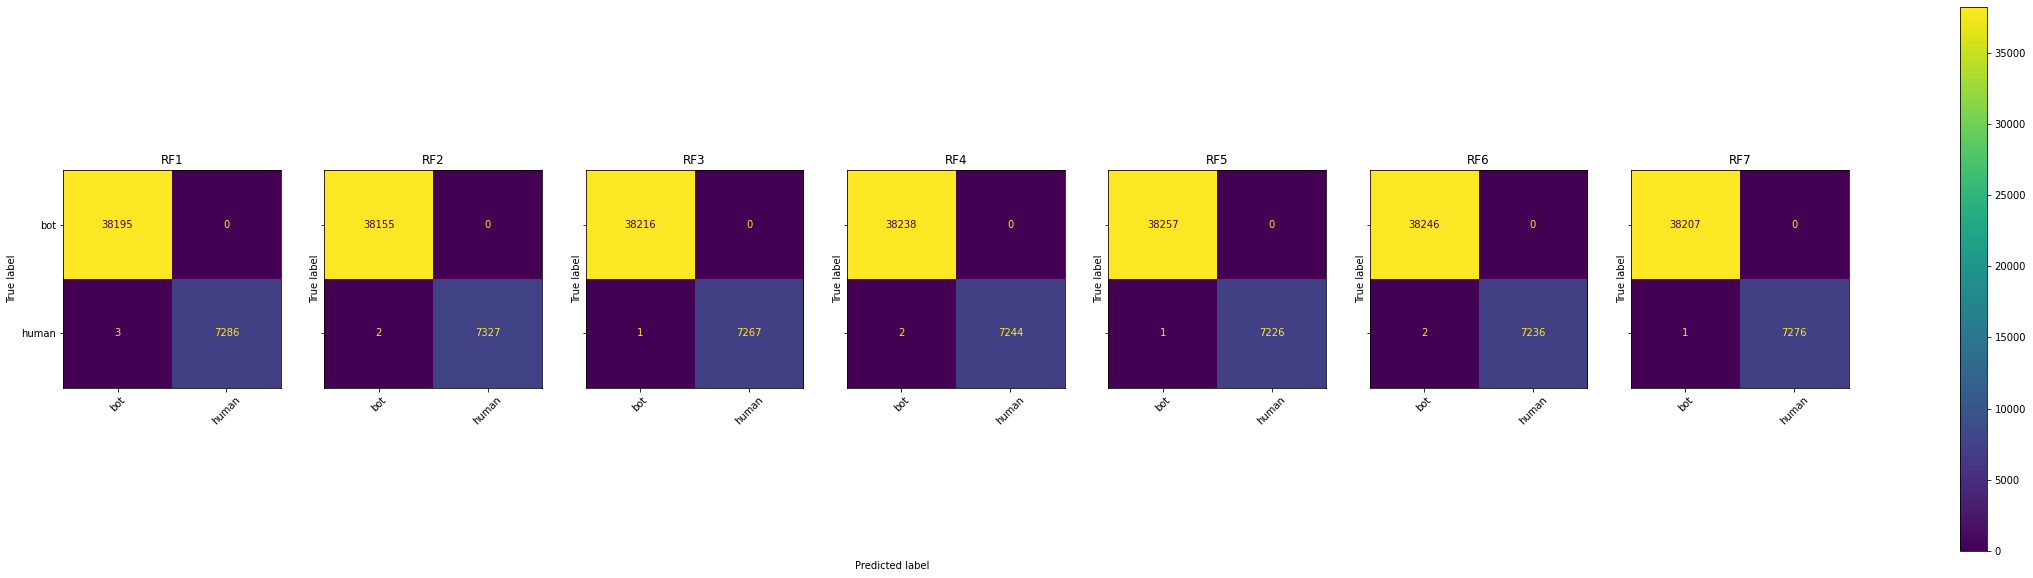

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,RF1,0.999921,1.0,0.999961,38195,1.0,0.999588,0.999794,7289,0.999934
1,RF2,0.999948,1.0,0.999974,38155,1.0,0.999727,0.999864,7329,0.999956
2,RF3,0.999974,1.0,0.999987,38216,1.0,0.999862,0.999931,7268,0.999978
3,RF4,0.999948,1.0,0.999974,38238,1.0,0.999724,0.999862,7246,0.999956
4,RF5,0.999974,1.0,0.999987,38257,1.0,0.999862,0.999931,7227,0.999978
5,RF6,0.999948,1.0,0.999974,38246,1.0,0.999724,0.999862,7238,0.999956
6,RF7,0.999974,1.0,0.999987,38207,1.0,0.999863,0.999931,7277,0.999978


In [ ]:
y_predict={}
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])
for i, (key, clas_f) in enumerate(classifer.items()):
    y_predict["train"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["train"+str(i+1)])
    cf_matrix = confusion_matrix(y["train"+str(i+1)], y_predict["train"+str(i+1)])
    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

    classifer_accuracy_row=[key]
    for index_2,(key,value) in enumerate(classification_report(y["train"+str(i+1)], y_predict["train"+str(i+1)],output_dict=True).items()):
      if key in ["bot","human"]:
        classifer_accuracy_row.extend([*value.values()])
      elif key=="accuracy":
        classifer_accuracy_row.append(value)
    classifer_accuracy_result.loc[i]=classifer_accuracy_row

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)

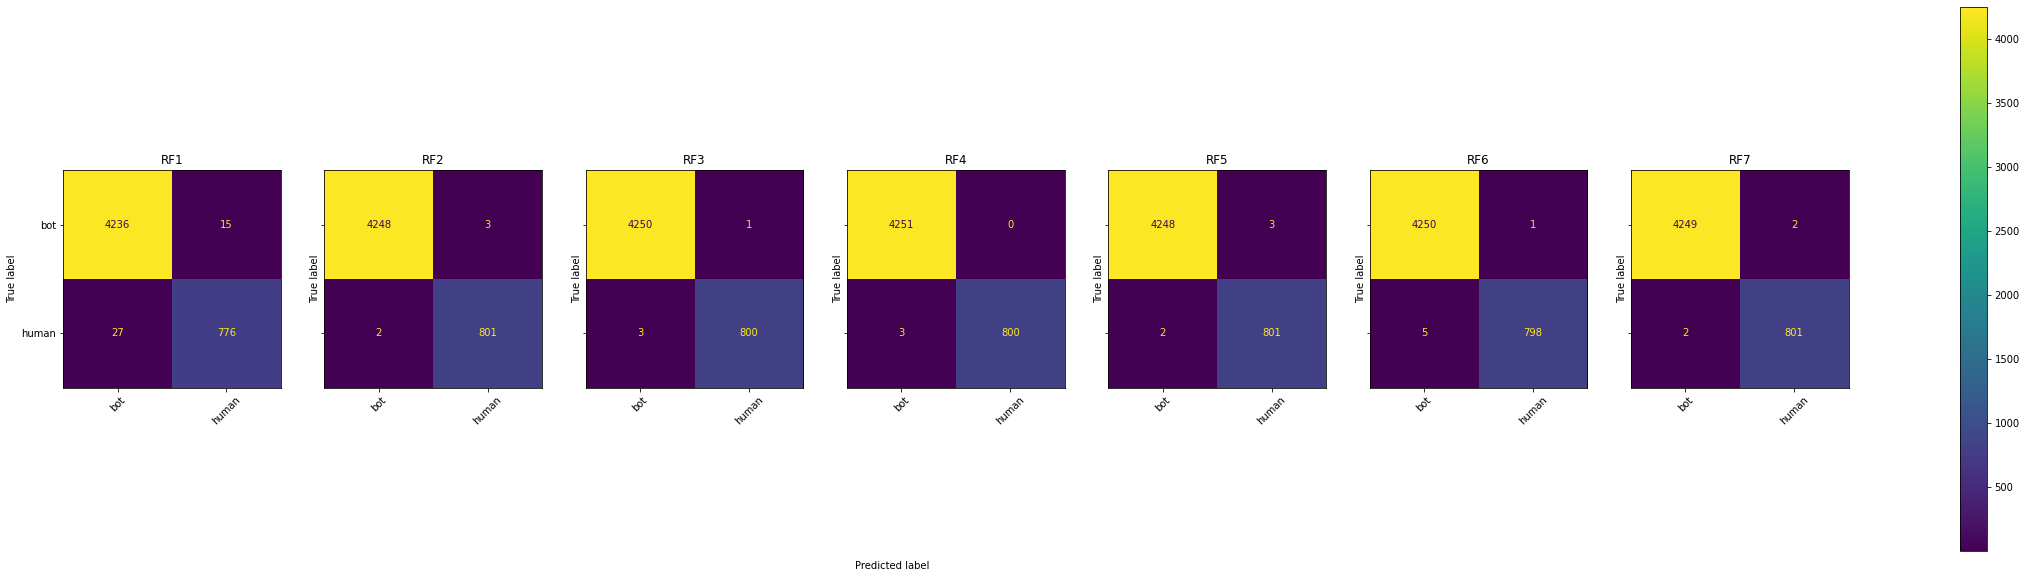

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,RF1,0.993666,0.996471,0.995067,4251,0.981037,0.966376,0.973651,803,0.991690
1,RF2,0.999529,0.999294,0.999412,4251,0.996269,0.997509,0.996889,803,0.999011
2,RF3,0.999295,0.999765,0.999530,4251,0.998752,0.996264,0.997506,803,0.999209
3,RF4,0.999295,1.000000,0.999647,4251,1.000000,0.996264,0.998129,803,0.999406
4,RF5,0.999529,0.999294,0.999412,4251,0.996269,0.997509,0.996889,803,0.999011
5,RF6,0.998825,0.999765,0.999295,4251,0.998748,0.993773,0.996255,803,0.998813
6,RF7,0.999530,0.999530,0.999530,4251,0.997509,0.997509,0.997509,803,0.999209


In [ ]:
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])
for i, (key, clas_f) in enumerate(classifer.items()):
    y_predict["test"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["test1"])
    cf_matrix = confusion_matrix(y["test1"], y_predict["test"+str(i+1)])

    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

    classifer_accuracy_row=[key]
    for index_2,(key,value) in enumerate(classification_report(y["test1"], y_predict["test"+str(i+1)],output_dict=True).items()):
      if key in ["bot","human"]:
        classifer_accuracy_row.extend([*value.values()])
      elif key=="accuracy":
        classifer_accuracy_row.append(value)
    classifer_accuracy_result.loc[i]=classifer_accuracy_row

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)

In [ ]:
print(len(y_predict["test1"]))

5054


In [ ]:
output_prediction=list()
for index,value in enumerate(y_predict["test1"]):
  if [y_predict["test1"][index],y_predict["test2"][index],y_predict["test3"][index],y_predict["test4"][index],y_predict["test5"][index],y_predict["test6"][index],y_predict["test7"][index]].count("bot")>3:
    output_prediction.append("bot")
  else:
    output_prediction.append("human")
output_prediction = np.array(output_prediction)

              precision    recall  f1-score   support

         bot       1.00      1.00      1.00      4251
       human       1.00      1.00      1.00       803

    accuracy                           1.00      5054
   macro avg       1.00      1.00      1.00      5054
weighted avg       1.00      1.00      1.00      5054



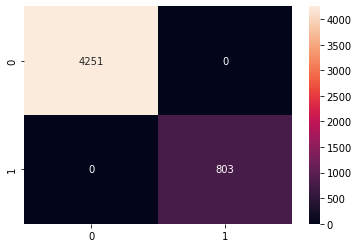

In [ ]:
print(classification_report(y["test1"], output_prediction))
cm = confusion_matrix(y["test1"], output_prediction)
sns.heatmap(cm, annot=True,fmt="d")

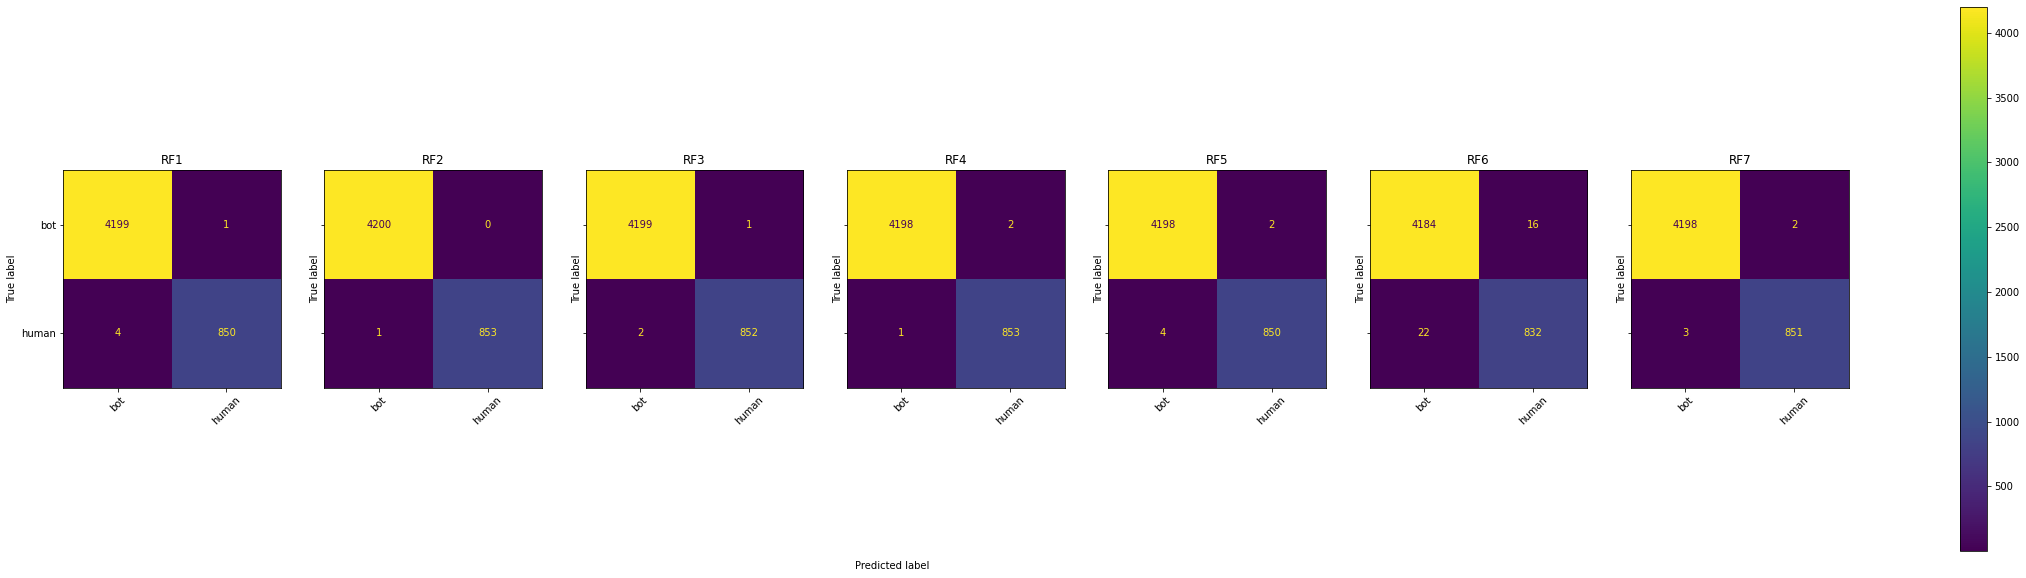

In [ ]:
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
for i, (key, clas_f) in enumerate(classifer.items()):
    y_predict["test"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["test6"])
    cf_matrix = confusion_matrix(y["test6"], y_predict["test"+str(i+1)])

    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

In [ ]:
X["test1"].head()

,favourites_count,followers_count,favourites_growth_rate,followers_friends_ratio,friends_growth_rate,statuses_count,listed_count,friends_count,followers_growth_rate,verified,tweet_freq,listed_growth_rate,name_length,description_length,screen_name_length,default_profile,profile_use_background_image,num_digits_in_screen_name,num_digits_in_name
14606,-0.179825,-0.011395,-0.080402,-0.081792,-0.242225,-0.176242,-0.035115,-0.106245,-0.081792,-0.092853,-0.319286,-0.137824,-0.759479,-0.681273,0.886413,0.383916,0.253253,1.411837,-0.184278
48689,-0.177063,-0.010951,0.371693,0.588412,0.845325,-0.174862,-0.026207,-0.035128,0.588412,-0.092853,-0.074763,6.354674,-0.385742,-0.504133,-2.371382,0.383916,0.253253,0.216771,2.889593
11725,-0.142027,-0.010938,0.441902,0.024320,-0.203415,-0.153293,-0.030661,-0.082664,0.024320,-0.092853,-0.001346,0.361599,0.922335,2.212007,-0.742485,0.383916,0.253253,-0.978295,-0.184278
18034,-0.182666,-0.011386,-0.233944,-0.055764,-0.264649,-0.171521,-0.035115,-0.109239,-0.055764,-0.092853,0.990092,-0.137824,-0.572611,-0.681273,0.886413,0.383916,0.253253,1.411837,-0.184278
16699,-0.182666,-0.011395,-0.233944,-0.081792,-0.264649,-0.176387,-0.035115,-0.109239,-0.081792,-0.092853,-0.240408,-0.137824,0.735467,-0.681273,0.886413,0.383916,0.253253,1.411837,-0.184278


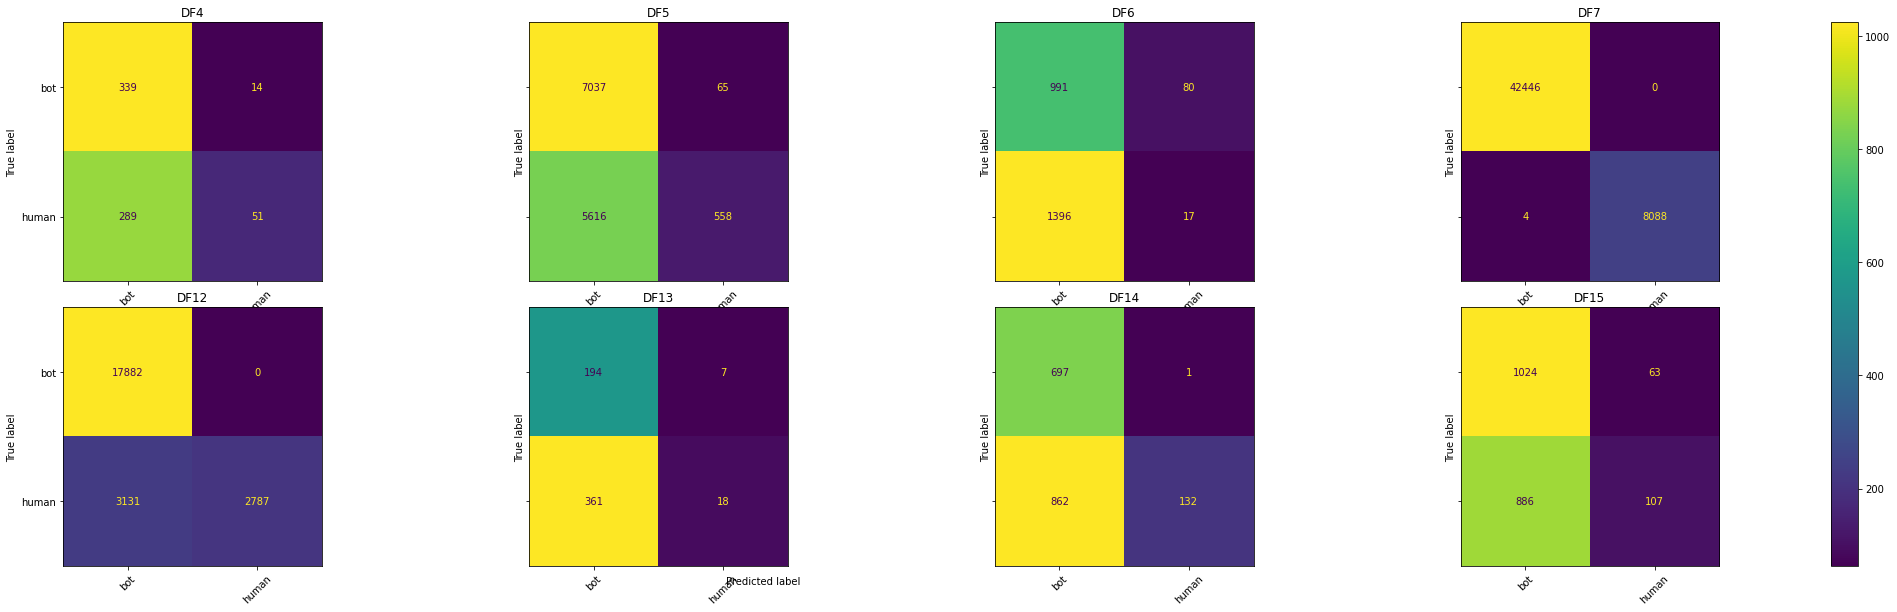

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,DF4,0.539809,0.960340,0.691131,353,0.784615,0.150000,0.251852,340,0.562771
1,DF5,0.556153,0.990848,0.712427,7102,0.895666,0.090379,0.164190,6174,0.572085
2,DF6,0.415165,0.925303,0.573164,1071,0.175258,0.012031,0.022517,1413,0.405797
3,DF7,0.999906,1.000000,0.999953,42446,1.000000,0.999506,0.999753,8092,0.999921
4,DF12,0.850997,1.000000,0.919501,17882,1.000000,0.470936,0.640322,5918,0.868445
5,DF13,0.349550,0.965174,0.513228,201,0.720000,0.047493,0.089109,379,0.365517
6,DF14,0.447081,0.998567,0.617634,698,0.992481,0.132797,0.234250,994,0.489953
7,DF15,0.536126,0.942042,0.683350,1087,0.629412,0.107754,0.184007,993,0.543750


In [ ]:
datasets=["DF4","DF5","DF6","DF7","DF12","DF13","DF14","DF15"]
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])

f, axes = plt.subplots(2, 4, figsize=(40, 10), sharey='row')

for index,dataset in enumerate(datasets):
  test = pd.read_csv(f'PATH/{dataset}.csv.gz',compression='gzip',lineterminator='\n');
  test= test.sample(frac=1).reset_index(drop=True)

  y_new_predict={}
  for i, (key, clas_f) in enumerate(classifer.items()):
    y_new_predict["test"+str(i+1)] = classifer["RF"+str(i+1)].predict(test.drop(['class'],axis=1))
  output_prediction=list()
  for index_2,value in enumerate(y_new_predict["test1"]):
    if [y_new_predict["test1"][index_2],y_new_predict["test2"][index_2],y_new_predict["test3"][index_2],y_new_predict["test4"][index_2],y_new_predict["test5"][index_2],y_new_predict["test6"][index_2],y_new_predict["test7"][index_2]].count("bot")>3:
      output_prediction.append("bot")
    else:
      output_prediction.append("human")
  output_prediction = np.array(output_prediction)

  classifer_accuracy_row=[dataset]
  for index_2,(key,value) in enumerate(classification_report(test['class'], output_prediction,output_dict=True).items()):
    if key in ["bot","human"]:
      classifer_accuracy_row.extend([*value.values()])
    elif key=="accuracy":
      classifer_accuracy_row.append(value)
  classifer_accuracy_result.loc[index]=classifer_accuracy_row

  cf_matrix = confusion_matrix(test['class'], output_prediction)
  disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
  disp.plot(ax=axes[int(np.floor(index/4))][index%4], xticks_rotation=45)
  disp.ax_.set_title(dataset)
  disp.im_.colorbar.remove()
  disp.ax_.set_xlabel('')


f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)